In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(context='poster', rc={'figure.figsize':(12, 10)})

In [2]:
timing_df = pd.read_csv('UMAP Benchmark Results - Jan timing for export.csv')
timing_df

,Size,UMAP Time,UMAP Time.1,UMAP Time.2,UMAP Time.3,UMAP Time.4,mc_tSNE_1,mc_tSNE_2,mc_tSNE_3,mc_tSNE_4,...,FIt-SNE_1,FIt-SNE_2,FIt-SNE_3,FIt-SNE_4,FIt-SNE_5,LargeVis1,LargeVis2,LargeVis3,LargeVis4,LargeVis5
0,1000,5.43,3.81,3.97,4.02,4.21,3.19,3.55,3.33,3.20,...,85.28,15.75,27.70,22.68,35.45,729.87,730.58,809.18,726.32,727.57
1,5000,15.30,27.04,25.64,22.68,27.09,25.80,24.40,22.99,23.02,...,19.61,20.25,18.84,17.93,21.38,795.78,825.77,811.34,795.45,791.26
2,10000,27.63,27.87,27.75,27.61,27.81,55.82,57.49,54.16,55.89,...,30.71,31.81,31.43,31.39,33.16,853.73,872.57,929.40,847.40,848.15
3,50000,86.31,82.95,81.47,82.43,83.96,914.50,1013.45,932.23,1060.33,...,176.63,174.32,177.95,174.53,186.33,1447.91,1481.93,1465.82,1452.91,1460.53
4,100000,200.85,179.41,179.33,180.89,184.09,3563.14,3273.37,3268.38,3807.23,...,389.86,376.09,359.60,373.91,371.05,2284.65,2292.77,2245.29,2247.90,2280.27
5,500000,1105.55,1132.47,1123.78,1122.50,1100.21,73865.63,78539.23,86861.54,86022.87,...,2111.72,2147.00,2146.70,2138.09,2053.57,10001.00,10600.20,11293.26,10291.84,10206.81
6,1000000,2576.79,2585.25,2565.26,2548.41,2565.14,344971.77,332470.32,331633.64,344588.02,...,4509.23,4450.22,4542.53,4521.41,4279.62,24276.48,25182.41,23947.24,23094.13,23681.21
7,1500000,4352.81,4340.52,4342.51,4345.73,4300.99,NaN,NaN,NaN,NaN,...,7622.28,8071.05,7880.27,7738.53,7266.74,NaN,NaN,NaN,NaN,NaN
8,2000000,6526.14,6431.80,6400.52,6435.94,6404.70,NaN,NaN,NaN,NaN,...,10163.65,9974.16,9391.53,9866.93,9127.82,NaN,NaN,NaN,NaN,NaN
9,2500000,8944.85,9038.97,8937.25,9139.82,8966.68,NaN,NaN,NaN,NaN,...,13584.66,13670.58,12409.23,13006.06,12471.47,NaN,NaN,NaN,NaN,NaN


In [3]:
umap_timing_df = (timing_df.set_index('Size')[[x for x in timing_df.columns if x.startswith('UMAP')]]
                  .stack().reset_index('Size')).rename(columns={'Size':'size', 0:'time'})
tsne_timing_df = (timing_df.set_index('Size')[[x for x in timing_df.columns if x.startswith('mc_tSNE')]]
                  .stack().reset_index('Size')).rename(columns={'Size':'size', 0:'time'})
tsne_8core_timing_df = (timing_df.set_index('Size')[[x for x in timing_df.columns if x.startswith('mc_8_tSNE')]]
                  .stack().reset_index('Size')).rename(columns={'Size':'size', 0:'time'})
fitsne_timing_df = (timing_df.set_index('Size')[[x for x in timing_df.columns if x.startswith('FIt-SNE')]]
                  .stack().reset_index('Size')).rename(columns={'Size':'size', 0:'time'})
largevis_timing_df = (timing_df.set_index('Size')[[x for x in timing_df.columns if x.startswith('LargeVis')]]
                  .stack().reset_index('Size')).rename(columns={'Size':'size', 0:'time'})

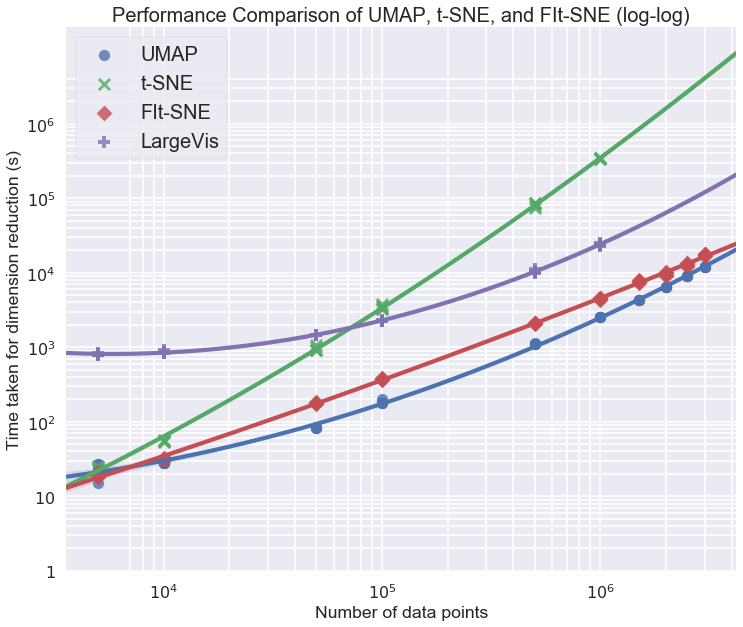

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

xticks = np.log10(np.hstack([
#    np.arange(700, 1000, 100),
    np.arange(7000,10000,1000), 
    np.arange(10000,100000,10000),
    np.arange(100000,1000000,100000),
    np.arange(1000000,5000000,1000000),
    ]))
#xtick_labels = [""] * 3 + ["$10^3$"] + [""]*8 + ["$10^4$"] + [""]*8 + ["$10^5$"] + [""]*8 + ["$10^6$"]
xtick_labels = [""] * 3 + ["$10^4$"] + [""]*8 + ["$10^5$"] + [""]*8 + ["$10^6$"]
yticks = np.log10(np.hstack([
    np.arange(1, 10, 1),
    np.arange(10,100,10),
    np.arange(100, 1000, 100),
    np.arange(1000, 10000, 1000),
    np.arange(10000, 100000, 10000),
    np.arange(100000, 1000000, 100000),
    np.arange(1000000, 5000000, 1000000),
]))
ytick_labels = ["$1$"] + [""]*8 + ["$10$"] +\
                [""]*8 + ["$10^{2}$"] + [""]*8 + ["$10^3$"] +\
                [""]*8 + ["$10^4$"] + [""]*8 + ["$10^5$"] +\
                [""]*8 + ["$10^6$"]

sns.regplot(x='size', y='time', data=np.log10(umap_timing_df.iloc[5:]), order=2, ax=ax, label='UMAP')
sns.regplot(x='size', y='time', data=np.log10(tsne_timing_df.iloc[5:]), order=2, ax=ax, label='t-SNE', marker='x')
#sns.regplot(x='size', y='time', data=np.log10(tsne_8core_timing_df.iloc[5:]), order=2, ax=ax, label='8 core t-SNE', marker='^')
sns.regplot(x='size', y='time', data=np.log10(fitsne_timing_df.iloc[5:]), order=2, ax=ax, label='FIt-SNE', marker='D')
sns.regplot(x='size', y='time', data=np.log10(largevis_timing_df.iloc[5:]), order=2, ax=ax, label='LargeVis', marker='P')
ax.set_xlabel('Number of data points')
ax.set_ylabel('Time taken for dimension reduction (s)')
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels);
plt.title('Performance Comparison of UMAP, t-SNE, and FIt-SNE (log-log)', fontsize=20)
plt.legend(loc='best', frameon=True, fancybox=True, fontsize=20)
#plt.savefig('performance_comparison.png')

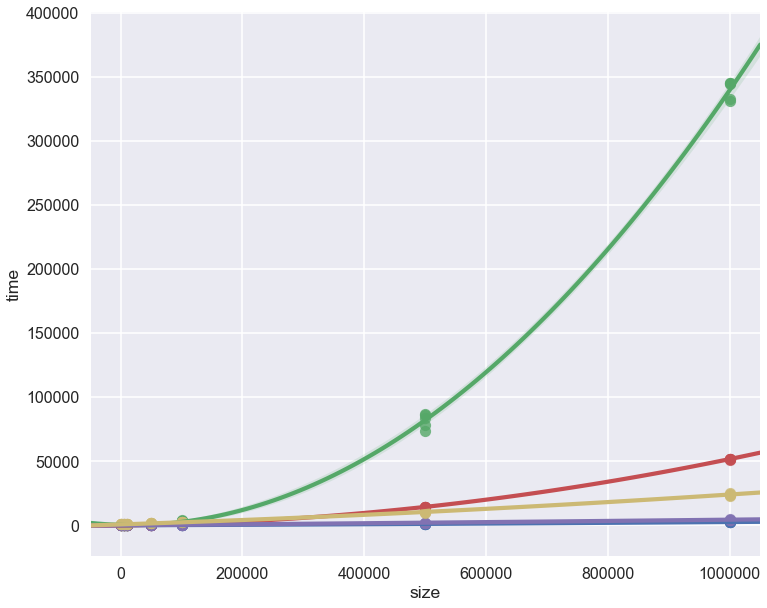

In [5]:
sns.regplot(x='size', y='time', data=(umap_timing_df[umap_timing_df['size'] <= 1000000]), order=2)
sns.regplot(x='size', y='time', data=(tsne_timing_df), order=2)
sns.regplot(x='size', y='time', data=(tsne_8core_timing_df), order=2)
sns.regplot(x='size', y='time', data=(fitsne_timing_df), order=2)
sns.regplot(x='size', y='time', data=(largevis_timing_df), order=2)